In [3]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Estimation with MLE

In [4]:
# beta should be higher than c
n = 100 # number of nodes - 585 similar to c elegans
d = 0  # number of neighbouts to take into account

#alpha = -0.3    #  negative 0.003
#beta  = -0.3    #  negative the higher the more concentrated will be the edges into a single vertex 0.003
sigma = np.log(1/1e-3 - 1)    # intercept the higher the harder for creating edges 6

n_iteration = 1000
warm_up     = 100

################################################
params_dict = {
    "n": n,
    "d": d,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [5]:
sigma

6.906754778648554

In [6]:
graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 2, stability_window = 20)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

In [7]:
#initial_guess = [0.5,0.5,-10]
#g = graphs[-1]
#est = estimator.MLEGraphModelEstimator(g, p=0)
#a_hat, b_hat, s_hat = est.estimate_parameters_torch(initial_guess=initial_guess, learning_rate=0.001, max_iter=30)

In [8]:
#print(a_hat,b_hat,s_hat)
#print(alpha, beta, sigma)

# Estimation with regression 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


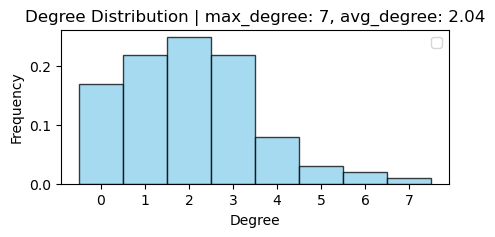

In [9]:
g = graphs[-1]
s = spec
G = nx.Graph(g)

ut = utils.GraphUtils()     
#fig = ut.plot_graph_and_spectrum(g, s, title='Graph and Spectrum', size=(10,5))
fig = ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))
#ut.save_graph_html(g, params_dict)

In [10]:
est = estimator.LogitRegEstimator(g , d=0)

In [15]:
features, labels = est.get_features_labels()
params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

print('real: ', sigma)
print('est: ', -params[0])

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.107     
Date:               2024-06-10 16:57 AIC:              893.4319  
No. Observations:   4950             BIC:              912.9533  
Df Model:           2                Log-Likelihood:   -443.72   
Df Residuals:       4947             LL-Null:          -496.92   
Converged:          1.0000           LLR p-value:      7.8057e-24
No. Iterations:     24.0000          Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -6.0869     0.2826   -21.5391   0.0000   -6.6408   -5.5330
x1        0.5105     0.0566     9.0135   0.0000    0.3995    0.6215
x2        0.3498     0.0596     5.8733   0.0000    0.2331    0.4665

real:  6.90675477864855

# Multiple times

In [107]:
n_runs = 20
params_list = []
for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, p=p, alpha=alpha, beta=beta, sigma=sigma, threshold=threshold, n_iteration=n_iteration, warm_up=warm_up)
    graphs, _ = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect

    est = estimator.LogitRegEstimator(g, p=0)
    params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0)
    params_list.append(params)

    import pickle
    with open(f'runs/results_array2_{i}.pkl', 'wb') as f:
        pickle.dump(params_list, f)



iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
KS Statistic: 0.042
KS Statistic: 0.032
KS Statistic: 0.019
KS Statistic: 0.025
Degree Distribution Stable: True
Graph Converged: True




                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.102      
Date:               2024-04-18 13:47 AIC:              6966.4472  
No. Observations:   499500           BIC:              6999.8113  
Df Model:           2                Log-Likelihood:   -3480.2    
Df Residuals:       499497           LL-Null:          -3877.0    
Converged:          1.0000           LLR p-value:      4.6138e-173
No. Iterations:     39.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------

In [108]:
sigma

(0.0046045031857657025, 0.0046045031857657025, -6.906754778648554)